# **Machine Learning Project**
using the Heart Failure Clinical Records Dataset
# Group 4, 02-03 2022

In [2]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("heart_failure_dataset.csv")

The cell below gives introductory understanding to the dataset 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


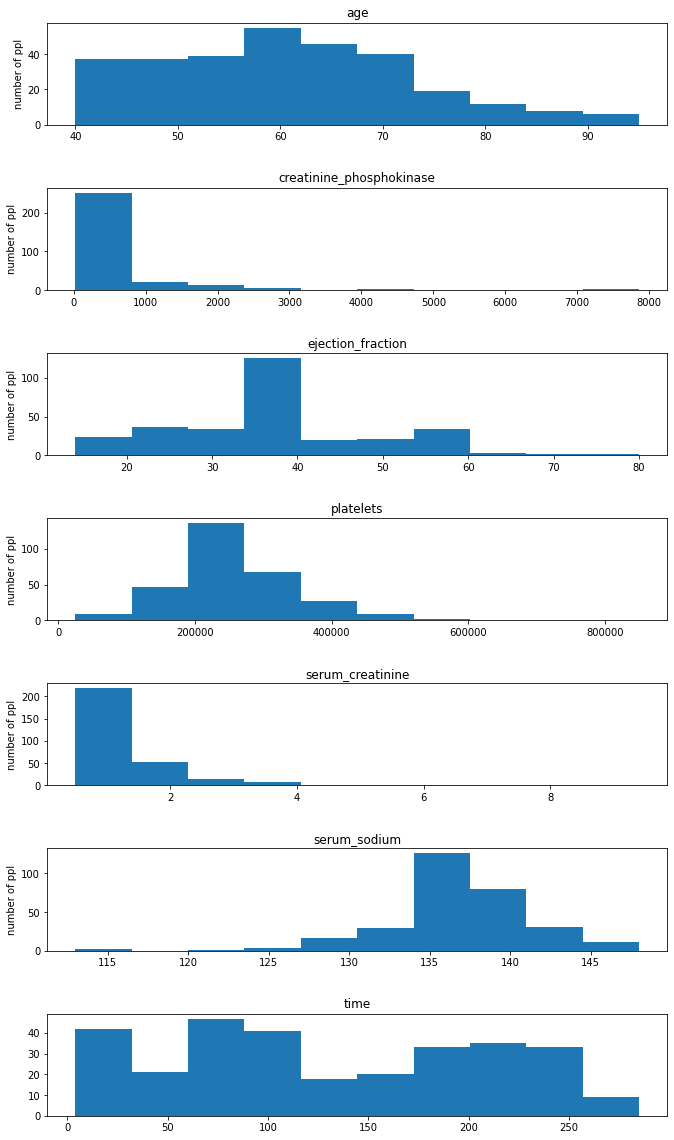

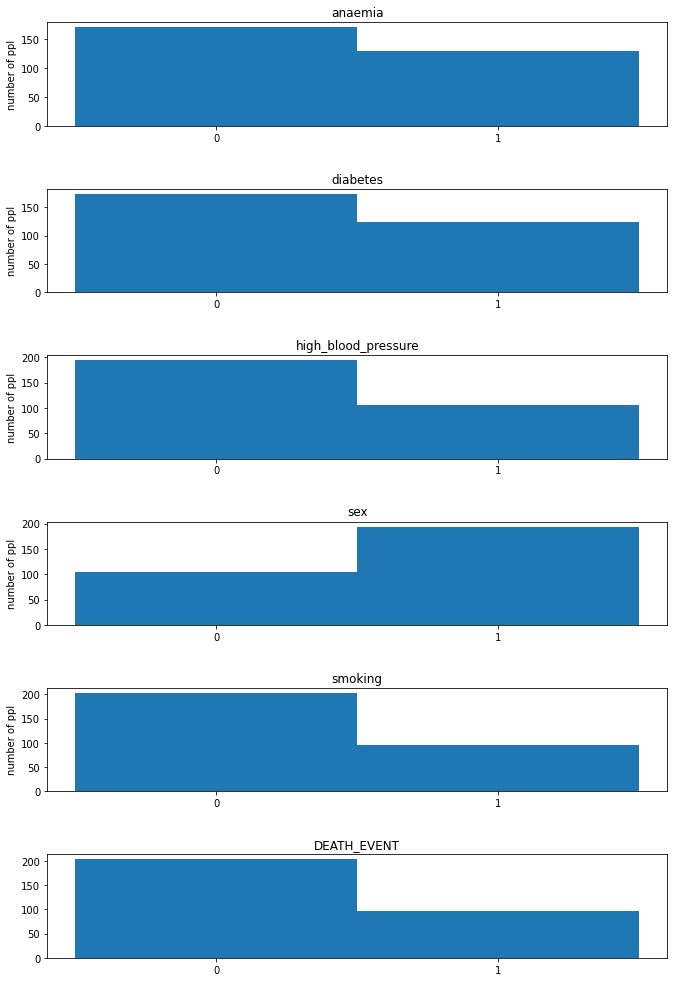

In [4]:
#------------- SOME BASIC VISUALIZATION -------------
display(data)
columns_cont = ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"]
columns_bin = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking", "DEATH_EVENT"]
plt.figure(figsize=(10, 30))
n = 1

for i in columns_cont:
    plt.ylabel("number of ppl")
    plt.tight_layout(pad=3.0)
    plt.subplot(13,1,int(n))
    plt.title(i)
    plt.hist(data[i])
    n += 1

plt.figure(figsize=(10, 30))
for i in columns_bin:
    plt.ylabel("number of ppl")
    plt.tight_layout(pad=3.0)
    plt.subplot(13,1,int(n))
    plt.title(i)
    plt.hist(data[i], bins=[-.5,.5,1.5])
    plt.xticks((0,1))
    n += 1



In [5]:
#------------- CORRELATION MATRIX -------------
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

C:\Users\mille\AppData\Local\Temp\ipykernel_18500\440799487.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.00,0.09,-0.08,-0.10,0.06,0.09,-0.05,0.16,-0.05,0.07,0.02,-0.22,0.25
anaemia,0.09,1.00,-0.19,-0.01,0.03,0.04,-0.04,0.05,0.04,-0.09,-0.11,-0.14,0.07
creatinine_phosphokinase,-0.08,-0.19,1.00,-0.01,-0.04,-0.07,0.02,-0.02,0.06,0.08,0.00,-0.01,0.06
diabetes,-0.10,-0.01,-0.01,1.00,-0.00,-0.01,0.09,-0.05,-0.09,-0.16,-0.15,0.03,-0.00
ejection_fraction,0.06,0.03,-0.04,-0.00,1.00,0.02,0.07,-0.01,0.18,-0.15,-0.07,0.04,-0.27
high_blood_pressure,0.09,0.04,-0.07,-0.01,0.02,1.00,0.05,-0.00,0.04,-0.10,-0.06,-0.20,0.08
platelets,-0.05,-0.04,0.02,0.09,0.07,0.05,1.00,-0.04,0.06,-0.13,0.03,0.01,-0.05
serum_creatinine,0.16,0.05,-0.02,-0.05,-0.01,-0.00,-0.04,1.00,-0.19,0.01,-0.03,-0.15,0.29
serum_sodium,-0.05,0.04,0.06,-0.09,0.18,0.04,0.06,-0.19,1.00,-0.03,0.00,0.09,-0.20
sex,0.07,-0.09,0.08,-0.16,-0.15,-0.10,-0.13,0.01,-0.03,1.00,0.45,-0.02,-0.00


C:\Users\mille\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\mille\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


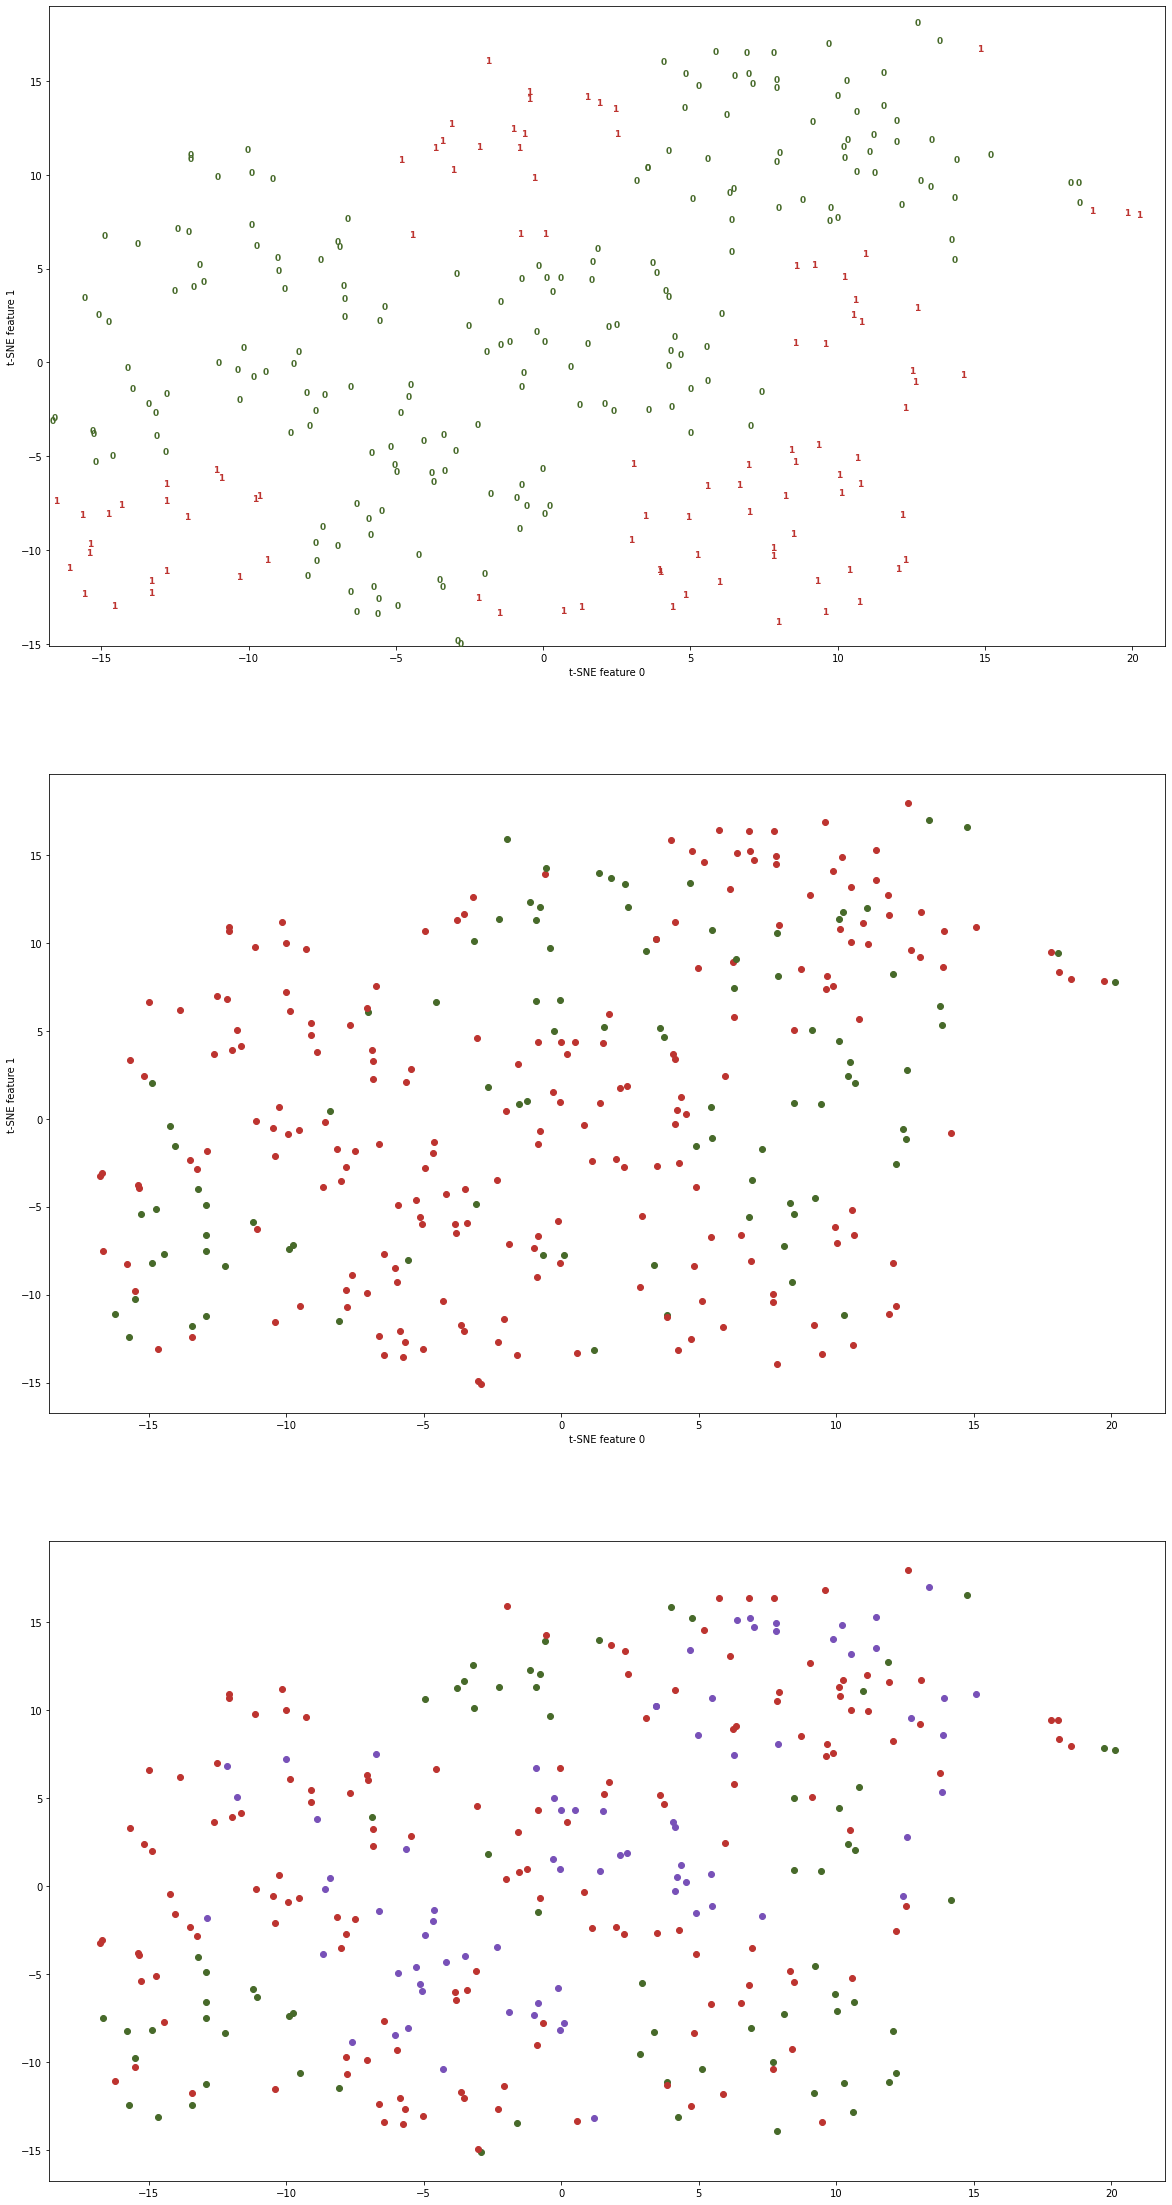

In [6]:
#------------- DIMENSIONALITY REDUCTION, T-SNE (UNSUPERVISED) -------------
from sklearn.manifold import TSNE

targets = data["DEATH_EVENT"]

colors = ["#476A2A","#BD3430", "#7851B8", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

normalized_df=(data-data.mean())/data.std()

tsne = TSNE(random_state = 1)

data_tsne = tsne.fit_transform(normalized_df ) #preplexity


plt.figure(figsize=(20, 40))
plt.subplot(3,1,1)
plt.xlim(data_tsne[:, 0].min(), data_tsne[:, 0].max() + 1)
plt.ylim(data_tsne[:, 1].min(), data_tsne[:, 1].max() + 1)


for i in range(len(data)):
    # actually plot the digits as text instead of using scatter
    plt.text(data_tsne[i, 0], data_tsne[i, 1], str(targets[i]),
             color = colors[targets[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")



ejection_fraction_list = []
for i in range(len(data)):
    #print(data["ejection_fraction"])
    if data["ejection_fraction"][i] <= 30:
        ejection_fraction_list.append(0) #0: <40
    else:
        ejection_fraction_list.append(1) #1: >40


plt.subplot(3,1,2)

for i in range(len(data)):
    plt.scatter(data_tsne[i, 0], data_tsne[i, 1],color = colors[ejection_fraction_list[i]] )


plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")


plt.subplot(3,1,3)
time_list = []
for i in range(len(data)):
    #print(data["ejection_fraction"])
    if data["time"][i] <= 70:
        time_list.append(0) #0: <
    elif 70< data["time"][i] <= 200:
        time_list.append(1) #1: >150
    else:
        time_list.append(2)




#plt.scatter(data_tsne[:,0],data_tsne[:,1])
for i in range(len(data)):
    plt.scatter(data_tsne[i, 0], data_tsne[i, 1],color = colors[time_list[i]] )

In [3]:
#------------- SPLITTING THE DATA -------------
from sklearn.model_selection import train_test_split

features = data.drop("DEATH_EVENT", axis = 1)
clean_data = data.drop("DEATH_EVENT", axis = 1)
clean_data1 = clean_data.drop("time", axis = 1)
targets = data["DEATH_EVENT"]

x_train, x_test, y_train, y_test = train_test_split(clean_data1, targets)

#ska jag kke droppa time här också dåra



Feature importances:
                 age  anamemia  creatinine_phosphokinase  diabetes  \
importance  0.046655  0.021918                  0.100455       0.0   

            ejection_fraction  high_blood_pressure  platelets  \
importance           0.059765              0.01938   0.086397   

            serum_creatinine  serum_sodium  sex   smoking      time  
importance          0.101065       0.03818  0.0  0.010229  0.515956  


<AxesSubplot:xlabel='serum_creatinine', ylabel='time'>

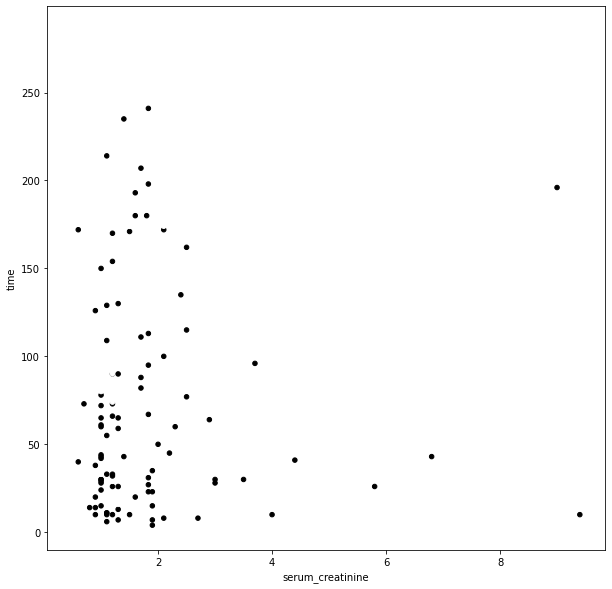

In [10]:
#------------- FEATURE SELECTION DESICION TREES--------------------------
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
# https://learning.oreilly.com/library/view/introduction-to-machine/9781449369880/ch02.html#decision-trees


tree = DecisionTreeClassifier(random_state=0)
tree.fit(features, targets)

# Vi vill väl inte testa modellen än? vi vill bara kolla vad den anser är de bästa features
"""
print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_test, y_test)))
"""

print("Feature importances:")
tree_importance = tree.feature_importances_
feature_list = ["age", "anamemia", "creatinine_phosphokinase", "diabetes", "ejection_fraction", "high_blood_pressure", "platelets", "serum_creatinine", "serum_sodium", "sex", "smoking", "time"]

tree_dict = dict(zip(feature_list, tree_importance))
df = pd.DataFrame(data=tree_dict, index=["importance"])
print(df)

def plot_feature_importances_cancer(model):
    n_features = 12
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), clean_data.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

#plot_feature_importances_cancer(tree)

dataframe = pd.DataFrame(data, columns=['ejection_fraction','serum_creatinine', "time"])
cmap = ListedColormap([[255, 102, 102], [102, 255, 153]])
#dataframe.plot.scatter("serum_creatinine", "time", cmap=cmap, s=20, c=data["DEATH_EVENT"], figsize=(10, 10))
dataframe.plot.scatter("serum_creatinine", "time", s=20, c=data["DEATH_EVENT"], figsize=(10, 10))

In [47]:
#------------- FEATURE SELECTION-------------
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif

#preforming k best feature selection

K_best = SelectKBest(f_classif, k = 3)
selected_features = K_best.fit_transform(features, targets)

#extracting the k best category names and printing them
sup = K_best.get_support()
featurenames = clean_data.columns
wanted_features = []
print("Features selected are:")
for nn in np.where(sup)[0]:
    print(featurenames[nn])
    wanted_features.append(featurenames[nn])

Features selected are:
ejection_fraction
serum_creatinine
time


Accuracy with all features:  0.7733333333333333
Accuracy with selected features:  0.72
Accuracy when always guessing death: 0.7066666666666667


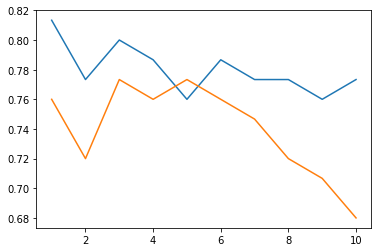

In [84]:
#---------------------- SUPERVISED: Desicion Tree ---------------------------

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

wanted_features = ["serum_sodium", "ejection_fraction", "serum_creatinine"]
x_train_feat = x_train[wanted_features]
x_test_feat = x_test[wanted_features]

# Choosing the best depth for the model (Seems to be 2)
score_all = []
score_feat = []
for i in range(10):
    tree = DecisionTreeClassifier(max_depth=i+1, random_state=0) #some nice pruning
    tree_model_all = tree.fit(x_train, y_train)
    tree_prediction_all = tree_model_all.predict(x_test)
    score_all.append(accuracy_score(tree_prediction_all,y_test))

    tree_model_feat = tree.fit(x_train_feat, y_train)
    tree_prediction_feat = tree_model_feat.predict(x_test_feat)
    score_feat.append(accuracy_score(tree_prediction_feat,y_test))

plt.plot(range(1, 11), score_all)
plt.plot(range(1, 11), score_feat)


# training the model
tree = DecisionTreeClassifier(max_depth=2, random_state=0) #some nice pruning
tree_model_all = tree.fit(x_train, y_train)
tree_prediction_all = tree_model_all.predict(x_test)
print("Accuracy with all features: ", accuracy_score(tree_prediction_all,y_test))

tree_model_feat = tree.fit(x_train_feat, y_train)
tree_prediction_feat = tree_model_feat.predict(x_test_feat)
print("Accuracy with selected features: ", accuracy_score(tree_prediction_feat,y_test))

#print("Accuracy on test set: {:.3f}".format(tree_prediction_all.score(x_test, y_test)))
#print("Accuracy on test set: {:.3f}".format(tree.score(X_test_feat, y_test)))

#tree_model_feat =
len_y = len(y_test)
alw = np.full((1,len_y),0)

print("Accuracy when always guessing death:", accuracy_score(alw.T, y_test))

#print(tree.feature_importances_)


#Vill skriva ut två grafer för att jämför förutspåelsen med det riktiga resultatet.

[1, 1, 1, 3, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 4, 3, 1, 1, 1]
[2, 2, 2, 4, 1, 3, 2, 1, 1, 3, 2, 1, 1, 8, 5, 6, 8, 1, 6, 6, 2, 1, 9, 7, 2, 4, 6, 2, 3]
Max/Min Accuracy - All features:  0.9066666666666666 0.8133333333333334
Max/Min Accuracy - Selected features:  0.8266666666666667 0.7066666666666667
Average - All features:  0.8579310344827584
Average - Selected features:  0.7650574712643678


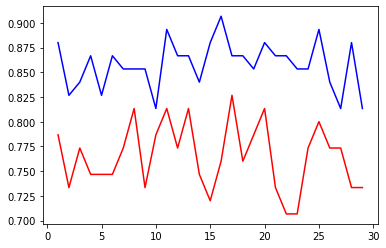

In [94]:
#---------------------- SUPERVISED: Desicion Tree ---------------------------

accuracies_all = []
accuracies_feat = []
depth_all_list = []
depth_feat_list = []

n = 30

for i in range(1,n):
    x_train, x_test, y_train, y_test = train_test_split(clean_data, targets)
    x_train_feat = x_train[wanted_features]
    x_test_feat = x_test[wanted_features]
    
    accuracy_score_all = 0
    depth_all = 0
    accuracy_score_feat = 0
    depth_feat = 0

    for j in range(1,10):
        tree = DecisionTreeClassifier(max_depth=j, random_state=0) #some nice pruning

        #creating tree, fitting and predicting for ALL features
        tree_model_all = tree.fit(x_train, y_train)
        tree_prediction_all = tree_model_all.predict(x_test)
        
        if accuracy_score(tree_prediction_all,y_test) > accuracy_score_all:
            accuracy_score_all = accuracy_score(tree_prediction_all,y_test)
            depth_all = j
        
        #creating tree, fitting and predicting for BEST features
        tree_model_feat = tree.fit(x_train_feat, y_train)
        tree_prediction_feat = tree_model_feat.predict(x_test_feat)
        
        if accuracy_score(tree_prediction_feat,y_test) > accuracy_score_feat:
            accuracy_score_feat = accuracy_score(tree_prediction_feat,y_test)
            depth_feat = j
    
    accuracies_all.append(accuracy_score_all) 
    accuracies_feat.append(accuracy_score_feat)
    depth_all_list.append(depth_all)
    depth_feat_list.append(depth_feat)

plt.plot(np.arange(1,n), accuracies_all, "b")
plt.plot(np.arange(1,n), accuracies_feat, "r")
print(depth_all_list)
print(depth_feat_list)

print("Max/Min Accuracy - All features: ", max(accuracies_all), min(accuracies_all))
print("Max/Min Accuracy - Selected features: ", max(accuracies_feat), min(accuracies_feat))
print("Average - All features: ", sum(accuracies_all) / len(accuracies_all))
print("Average - Selected features: ", sum(accuracies_feat) / len(accuracies_feat))

[8, 2, 4, 9, 2, 2, 9, 3, 8, 2, 4, 6, 9, 2, 6, 9, 2, 8, 4, 4, 3, 2, 4, 5, 3, 6, 6, 1, 2]
[2, 4, 4, 7, 4, 9, 9, 2, 8, 4, 7, 8, 9, 6, 8, 9, 3, 7, 9, 8, 9, 9, 6, 6, 8, 8, 8, 9, 1]
Max/Min Accuracy - All features:  0.7466666666666667 0.6133333333333333
Max/Min Accuracy - Selected features:  0.8533333333333334 0.68
Average - All features:  0.6873563218390804
Average - Selected features:  0.7710344827586206


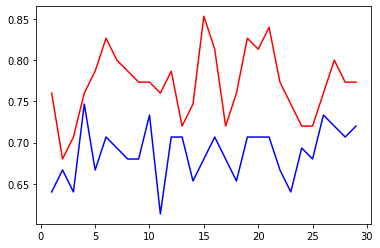

In [95]:
#---------------------- SUPERVISED: K-nearest neighbors ---------------------------
from sklearn.neighbors import KNeighborsClassifier

accuracies_all = []
accuracies_feat = []
depth_all_list = []
depth_feat_list = []

n = 30

for i in range(1,n):
    x_train, x_test, y_train, y_test = train_test_split(clean_data, targets)
    x_train_feat = x_train[wanted_features]
    x_test_feat = x_test[wanted_features]
    
    accuracy_score_all = 0
    depth_all = 0
    accuracy_score_feat = 0
    depth_feat = 0

    for j in range(1,10):
        neigbors = KNeighborsClassifier(n_neighbors=j)

        neigbors_model_all = neigbors.fit(x_train, y_train)
        neigbors_prediction_all = neigbors_model_all.predict(x_test)
        
        if accuracy_score(neigbors_prediction_all,y_test) > accuracy_score_all:
            accuracy_score_all = accuracy_score(neigbors_prediction_all,y_test)
            depth_all = j
        
        neigbors_model_feat = neigbors.fit(x_train_feat, y_train)
        neigbors_prediction_feat = neigbors_model_feat.predict(x_test_feat)
        
        if accuracy_score(neigbors_prediction_feat,y_test) > accuracy_score_feat:
            accuracy_score_feat = accuracy_score(neigbors_prediction_feat,y_test)
            depth_feat = j
    
    accuracies_all.append(accuracy_score_all) 
    accuracies_feat.append(accuracy_score_feat)
    depth_all_list.append(depth_all)
    depth_feat_list.append(depth_feat)

plt.plot(np.arange(1,n), accuracies_all, "b")
plt.plot(np.arange(1,n), accuracies_feat, "r")
print(depth_all_list)
print(depth_feat_list)

print("Max/Min Accuracy - All features: ", max(accuracies_all), min(accuracies_all))
print("Max/Min Accuracy - Selected features: ", max(accuracies_feat), min(accuracies_feat))
print("Average - All features: ", sum(accuracies_all) / len(accuracies_all))
print("Average - Selected features: ", sum(accuracies_feat) / len(accuracies_feat))